In [ ]:
!pip install pyomo

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyomo.environ import *

#### Get network data from a csv file (data file attached)

In [ ]:
df = pd.read_excel('714Project_Part1_data.xlsx')

In [ ]:
df.set_index('ID',inplace=True)

In [ ]:
df

,City,D,x,y
ID,,,,
MU,Mumbai,20668000,8089.394286,2117.445990
DE,Delhi,31181000,8571.056031,3179.572800
HY,Hyderabad,10269000,8712.576924,1929.972540
PU,Pune,6808000,8198.044305,2055.356586
CH,Chennai,11235018,8906.375487,1450.485729
GH,Ghaziabad,2866384,8596.926801,3182.132016
AH,Ahmedabad,8253226,8056.937442,2556.758793
NS,Nasik,2123000,8190.668133,2219.717394
BG,Bangalore,12765000,8611.451373,1439.941062


#### Candidate locations 
One or more of these locations can be selected as distribution centers

In [ ]:
candidates = ['HY','GH','AH','PU','NS']

#### Create distance matrix

In [ ]:
for c in candidates:
    X = df.at[c,'x']
    Y = df.at[c,'y']
    df[c] = np.sqrt(np.abs((df.x -  X)**2 + (df.y - Y)**2))
    

In [ ]:
i = 'NS'
j = 'DE'
df.at[j,i]

1032.4811636888508

In [ ]:
data = df
data

,City,D,x,y,HY,GH,AH,PU,NS
ID,,,,,,,,,
MU,Mumbai,20668000,8089.394286,2117.445990,650.771000,1179.468350,440.510142,125.139605,143.929956
DE,Delhi,31181000,8571.056031,3179.572800,1257.588555,25.997045,807.598422,1184.482944,1032.481164
HY,Hyderabad,10269000,8712.576924,1929.972540,0.000000,1257.488888,907.041420,529.589440,596.942934
PU,Pune,6808000,8198.044305,2055.356586,529.589440,1195.294991,520.879372,0.000000,164.526238
CH,Chennai,11235018,8906.375487,1450.485729,517.170654,1759.078552,1394.770621,931.451457,1050.692329
GH,Ghaziabad,2866384,8596.926801,3182.132016,1257.488888,0.000000,826.244622,1195.294991,1044.647314
AH,Ahmedabad,8253226,8056.937442,2556.758793,907.041420,826.244622,0.000000,520.879372,362.602816
NS,Nasik,2123000,8190.668133,2219.717394,596.942934,1044.647314,362.602816,164.526238,0.000000
BG,Bangalore,12765000,8611.451373,1439.941062,500.357099,1742.251498,1246.903181,741.378224,886.064142


In [ ]:
UnitCost = 35
FixedCost = 8400000000
Pmin = 1
Pmax = 5
S = data['D'].sum()
D = data['D'].sum()

In [ ]:
# Add distance in a dictionary
Distance = {}
for c in candidates:
    for i, row in data.iterrows():
        Distance[c,i] = data.at[i,c]

print(Distance)
    

{('HY', 'MU'): 650.7710002447428, ('HY', 'DE'): 1257.5885547139753, ('HY', 'HY'): 0.0, ('HY', 'PU'): 529.5894400442013, ('HY', 'CH'): 517.1706535988039, ('HY', 'GH'): 1257.4888883352053, ('HY', 'AH'): 907.0414198409072, ('HY', 'NS'): 596.9429340754136, ('HY', 'BG'): 500.35709897623934, ('HY', 'KL'): 1237.7866414226887, ('HY', 'ID'): 660.1702753587293, ('HY', 'NG'): 422.5355631003622, ('GH', 'MU'): 1179.468349614307, ('GH', 'DE'): 25.997044580635173, ('GH', 'HY'): 1257.4888883352053, ('GH', 'PU'): 1195.294990898429, ('GH', 'CH'): 1759.078552125519, ('GH', 'GH'): 0.0, ('GH', 'AH'): 826.2446222993757, ('GH', 'NS'): 1044.647313673154, ('GH', 'BG'): 1742.2514983179706, ('GH', 'KL'): 1387.585235492836, ('GH', 'ID'): 683.5004513984783, ('GH', 'NG'): 854.4501601645817, ('AH', 'MU'): 440.51014245095075, ('AH', 'DE'): 807.5984217856958, ('AH', 'HY'): 907.0414198409072, ('AH', 'PU'): 520.8793718032722, ('AH', 'CH'): 1394.7706207206145, ('AH', 'GH'): 826.2446222993757, ('AH', 'AH'): 0.0, ('AH', 'N

In [ ]:
# Add demand to a dictionary
Demand = {}
for i, row in data.iterrows():
    Demand[i] = data.at[i,'D']

In [ ]:

!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

### Formulate a network facility location model
This is mixed integer programming model

In [ ]:
model = ConcreteModel()
model.dual = Suffix(direction=Suffix.IMPORT)

model.i = Set(initialize = candidates, doc='Candidate locations for DC')
model.j = Set(initialize = data.index.tolist(), doc='Customer locations')

model.d = Param(model.i, model.j, initialize=Distance, doc='Distance in miles')
model.f = Param(initialize=UnitCost, doc='Freight cost in dollars per mile')
model.fcl = Param(initialize=FixedCost, doc='Fixed cost to operate a location')

# Function to calculate cost 
def c_init(model, i, j):
  return model.f * model.d[i,j]
model.c = Param(model.i, model.j, initialize=c_init, doc='Transport cost in dollar per case')

# Initialize flow on arc as a variable
model.x = Var(model.i, model.j, bounds=(0.0,None),domain = NonNegativeReals, doc='Shipment quantities')

# Initialize DC open or close 
model.y = Var(model.i, bounds=(0,1), domain = NonNegativeIntegers, doc = 'DC open decison' )

# Function to get objective function rule
def objective_rule(model):
  return sum(model.c[i,j]*model.x[i,j] for i in model.i for j in model.j) + sum(model.fcl*model.y[i] for i in model.i)

model.cost = Objective(rule=objective_rule, sense=minimize, doc='Total cost')

#Define constraints
def supply_rule(model, i):
  return sum(model.x[i,j] for j in model.j) <= S
model.supply = Constraint(model.i, rule=supply_rule, doc='Observe supply limit at plant i')

def demand_rule(model, j):
  return sum(model.x[i,j] for i in model.i) >= Demand[j] 
model.demand = Constraint(model.j, rule=demand_rule, doc='Satisfy demand at market j')

def linking_constraint(model,i,j):
    return (model.x[i,j] - D * model.y[i] <=0)
model.linking = Constraint(model.i,model.j, rule=linking_constraint, doc='linking constraint')

def node_min(model):
    return sum(model.y[i] for i in model.i) >= Pmin
model.node_min = Constraint(rule=node_min, doc='minimum number of nodes')

def node_max(model):
    return sum(model.y[i] for i in model.i) <= Pmax
model.node_max = Constraint(rule=node_max, doc='maximum number of nodes')



In [ ]:
results=SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [ ]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 1319759492163.67
  Upper bound: 1319759492163.67
  Number of objectives: 1
  Number of constraints: 80
  Number of variables: 66
  Number of nonzeros: 251
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 11
      Number of created subproblems: 11
  Error rc: 0
  Time: 0.014768123626708984
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:

r = []
if 'ok' == str(results.Solver.Status):
    print("Total Shipping Costs = ",model.cost())
    for i in model.i:
        for j in model.j:
            if model.x[i,j]() > 0:
                r.append((i,j,model.x[i,j](),model.d[i,j],model.c[i,j]))
                
    result_df = pd.DataFrame(r, columns=['Origin','Destination','Flow','Distance','Cost'])
else:
    print("No Valid Solution Found")

Total Shipping Costs =  1319759492163.6692


### Optimized results

In [ ]:
model.cost()

1319759492163.6692

In [ ]:
result_df


,Origin,Destination,Flow,Distance,Cost
0,HY,HY,10269000.0,0.000000,0.000000
1,HY,CH,11235018.0,517.170654,18100.972876
2,HY,BG,12765000.0,500.357099,17512.498464
3,HY,KL,14974000.0,1237.786641,43322.532450
4,HY,NG,2940000.0,422.535563,14788.744709
5,GH,DE,31181000.0,25.997045,909.896560
6,GH,GH,2866384.0,0.000000,0.000000
7,AH,AH,124082628.0,0.000000,0.000000
8,AH,ID,3113000.0,364.941589,12772.955604
9,PU,MU,20668000.0,125.139605,4379.886172


### Visualize the network

In [ ]:
def draw_graph(flow, regions, dcs,distance):
    # create networkx graph
    G=nx.DiGraph()
    
    # add nodes
    G.add_nodes_from(regions, s="o")
    G.add_nodes_from(dcs, s="^")
    
    market_color = []
    dc_color = []

    for j in regions:
        market_color.append('blue')
        
    for k in dcs:
        dc_color.append('red')
    
    # add edges
    G.add_edges_from(flow)
    graph_pos = nx.kamada_kawai_layout(G,dist=distance)
    
    nodeShapes = set((aShape[1]["s"] for aShape in G.nodes(data = True)))
    
    #For each node class...
    for aShape in nodeShapes:
        if aShape == 'o':
            color_map = market_color
        else:
            color_map = dc_color
            
        nx.draw_networkx_nodes(G,graph_pos,node_shape = aShape, nodelist = [sNode[0] for sNode in filter(lambda x: x[1]["s"]==aShape,G.nodes(data = True))],node_size=1000, node_color=color_map, alpha=0.3)
    
    nx.draw_networkx_edges(G, graph_pos, width=2, alpha=0.3, edge_color='green')
    nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
    
    plt.axis('off')
    plt.show()

In [ ]:
flow = result_df[['Origin','Destination']].values.tolist()
dcs = result_df['Origin'].drop_duplicates().values.tolist()
reg = Demand.keys()
distance = result_df['Distance'].to_dict()
k = set(reg).difference(dcs)
regions = k

In [ ]:
pos = {}
for i, row in data.iterrows():
    x = data.at[i,'x']
    y = data.at[i,'y']
    pos[i] = x,y

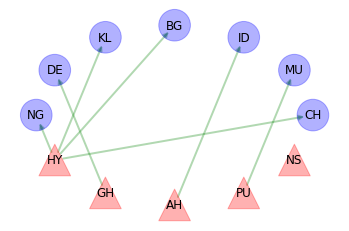

In [ ]:
draw_graph(flow,regions,dcs,pos)